In [2]:
#general 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


# models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score

#extra
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
raw_data = pd.read_csv('Airbnb_Listings.csv')
raw_data.head(3)
raw_data.shape 
raw_data.nunique() # find the values that are not unique

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,NaN,NaN,https://a0.muscache.com/im/pictures/529448/3d7...,NaN,7054,https://www.airbnb.com/users/show/7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/7054/profile_...,https://a0.muscache.com/im/users/7054/profile_...,Palo Alto,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,NaN,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",US,United States,37.43972,-122.15672,t,Villa,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",NaN,$90.00,$440.00,"$1,428.00",$0.00,$35.00,1,$45.00,2,365,2,2,365,365,2.0,365.0,2 months ago,t,0,0,0,0,2020-05-30,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""PALO ALTO""}",f,f,moderate,f,f,5,0,5,0,0.57
1,11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,NaN,NaN,https://a0.muscache.com/im/pictures/121321/2c5...,NaN,42458,https://www.airbnb.com/users/show/42458,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,90%,f,https://a0.muscach

(7221, 106)

id                                              7221
listing_url                                     7221
scrape_id                                          1
last_scraped                                       2
name                                            7077
summary                                         6051
space                                           4402
description                                     6439
experiences_offered                                1
neighborhood_overview                           3508
notes                                           2746
transit                                         3199
access                                          3377
interaction                                     3165
house_rules                                     3717
thumbnail_url                                      0
medium_url                                         0
picture_url                                     7018
xl_picture_url                                

In [4]:
# Feature Selection
selected_features = ['host_since', 'host_response_time', 'host_response_rate', 'host_is_superhost',
                     'host_listings_count', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
                     'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 
                     'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
                     'minimum_nights', 'maximum_nights', 'availability_90','availability_365', 
                     'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
                     'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                     'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                     'instant_bookable', 'cancellation_policy', 'reviews_per_month','latitude', 'longitude','neighbourhood']
# Fitting features to a dataset
data = raw_data[selected_features]
data.replace({'f':0, 't':1}, inplace=True);

In [5]:
data.isna().sum()
data.fillna(0, inplace=True);

# Format Data and features 

In [6]:
# Remove any other features that don't have enough inputs
data.astype(bool).sum(axis=0)

host_since                     7220
host_response_time             5414
host_response_rate             5414
host_is_superhost              3232
host_listings_count            6677
host_identity_verified         3159
neighbourhood_cleansed         7221
property_type                  7221
room_type                      7221
accommodates                   7221
bathrooms                      7197
bedrooms                       6810
beds                           6959
price                          7221
weekly_price                    574
monthly_price                   592
security_deposit               5764
cleaning_fee                   6421
guests_included                7221
extra_people                   7221
minimum_nights                 7221
maximum_nights                 7221
availability_90                5144
availability_365               5505
number_of_reviews              5912
number_of_reviews_ltm          5129
review_scores_rating           5854
review_scores_accuracy      

## Data Cleaning

In [7]:
# Droping redundant columns
data.drop(['weekly_price', 'monthly_price', ], axis=1, inplace=True)

In [8]:
data.property_type.value_counts()

House                 3715
Apartment             1152
Serviced apartment     504
Townhouse              429
Guest suite            363
Guesthouse             318
Condominium            303
Villa                  129
Bungalow               115
Loft                    41
Cottage                 29
Camper/RV               27
Boutique hotel          23
Tiny house              16
Other                   13
Bed and breakfast       12
Cabin                    7
Farm stay                6
Tent                     5
Treehouse                3
Yurt                     3
Barn                     2
Train                    1
Lighthouse               1
Campsite                 1
Earth house              1
Aparthotel               1
Chalet                   1
Name: property_type, dtype: int64

In [9]:
# Reduce property types into same areas
data.property_type.replace({
    'Serviced apartment': 'Apartment',
    'Townhouse': 'House',
    'Condominium': 'Apartment',
    'Villa': 'House',
    'Bungalow': 'House',
    'Loft': 'Apartment',
    'Cottage': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Guesthouse': 'House',
    'Guest suite': 'Other',
    'Camper/RV': 'Other',
    'Boutique hotel': 'Other',
    'Bed and breakfast': 'Other',
    'Cabin': 'Other',
    'Farm stay': 'Other',
    'Tent': 'Other',
    'Yurt': 'Other',
    'Treehouse': 'Other',
    'Barn': 'Other',
    'Campsite': 'Other',
    'Chalet': 'Other',
    'Aparthotel': 'Other', 
    'Train': 'Other',
    'Lighthouse': 'Other'
}, inplace = True);

data.property_type.value_counts()

House        4752
Apartment    2000
Other         469
Name: property_type, dtype: int64

In [10]:
# Convert string prices to int values

data.price = data.price.str[1:-3]
data.price = data.price.str.replace(",", "")
data.price = data.price.astype('int64')

data.security_deposit = data.security_deposit.str[1:-3]
data.security_deposit = data.security_deposit.str.replace(",","")
data.security_deposit.fillna(0, inplace= True)
data.security_deposit = data.security_deposit.astype('int64')

data.cleaning_fee = data.cleaning_fee.str[1:-3]
data.cleaning_fee = data.cleaning_fee.str.replace(",","")
data.cleaning_fee.fillna(0, inplace= True)
data.cleaning_fee = data.cleaning_fee.astype('int64')

data.extra_people = data.extra_people.str[1:-3]
data.extra_people = data.extra_people.str.replace(",","")
data.extra_people.fillna(0, inplace= True)
data.extra_people = data.extra_people.astype('int64')

In [11]:
data.nunique()

host_since                     2085
host_response_time                5
host_response_rate               44
host_is_superhost                 2
host_listings_count              61
host_identity_verified            2
neighbourhood_cleansed           16
property_type                     3
room_type                         4
accommodates                     16
bathrooms                        15
bedrooms                         10
beds                             20
price                           420
security_deposit                 83
cleaning_fee                    167
guests_included                  15
extra_people                     63
minimum_nights                   54
maximum_nights                  123
availability_90                  91
availability_365                361
number_of_reviews               288
number_of_reviews_ltm           108
review_scores_rating             41
review_scores_accuracy            9
review_scores_cleanliness         9
review_scores_checkin       

In [12]:
# Display category types
data['room_type'].value_counts()
data['property_type'].value_counts()
data['neighbourhood_cleansed'].value_counts().iloc[:8]

Private room       3454
Entire home/apt    3431
Shared room         334
Hotel room            2
Name: room_type, dtype: int64

House        4752
Apartment    2000
Other         469
Name: property_type, dtype: int64

San Jose                2882
Palo Alto                794
Sunnyvale                768
Santa Clara              711
Mountain View            664
Cupertino                325
Milpitas                 301
Unincorporated Areas     298
Name: neighbourhood_cleansed, dtype: int64

## Data Visualizing

<AxesSubplot:ylabel='room_type'>

<AxesSubplot:ylabel='property_type'>

<AxesSubplot:ylabel='neighbourhood_cleansed'>

Text(0, 0.5, '')

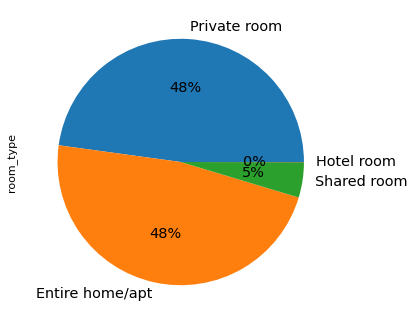

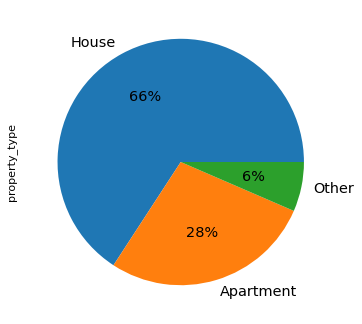

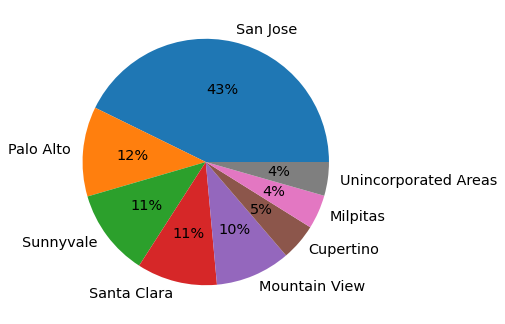

In [13]:
fig1 = plt.figure(figsize=(5,5), dpi=80)
data['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

fig2 = plt.figure(figsize=(5,5), dpi=80)
data['property_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

fig3 = plt.figure(figsize=(5,5), dpi=80)
data['neighbourhood_cleansed'].value_counts().iloc[:8].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)
plt.ylabel('')

In [14]:
data.price.describe()

count     7221.000000
mean       161.287079
std        352.069000
min         10.000000
25%         60.000000
50%        100.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:>

100    205
50     199
75     188
60     183
55     183
65     172
150    168
45     149
80     148
40     131
70     131
200    113
99     111
85     106
59     105
Name: price, dtype: int64

Text(0.5, 1.1, 'Number of rentals with price')

Text(0, 0.5, 'Number of Properties')

Text(0.5, 0, 'Price')

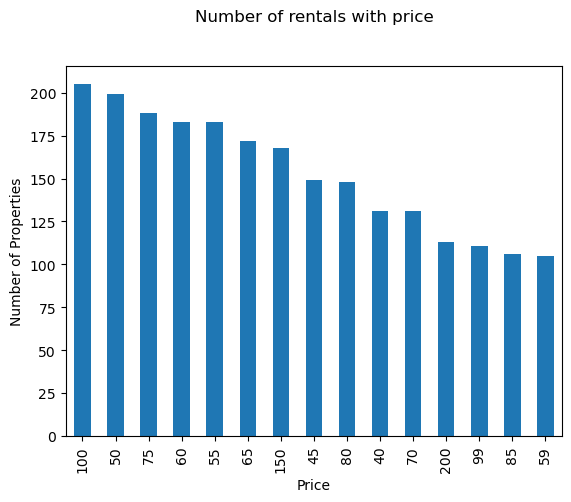

In [15]:
data.price.value_counts().iloc[:15].plot(kind='bar',)
data.price.value_counts().iloc[:15]
plt.title('Number of rentals with price', y=1.1)
plt.ylabel('Number of Properties')
plt.xlabel('Price')

<Figure size 2400x1200 with 0 Axes>

<AxesSubplot:>

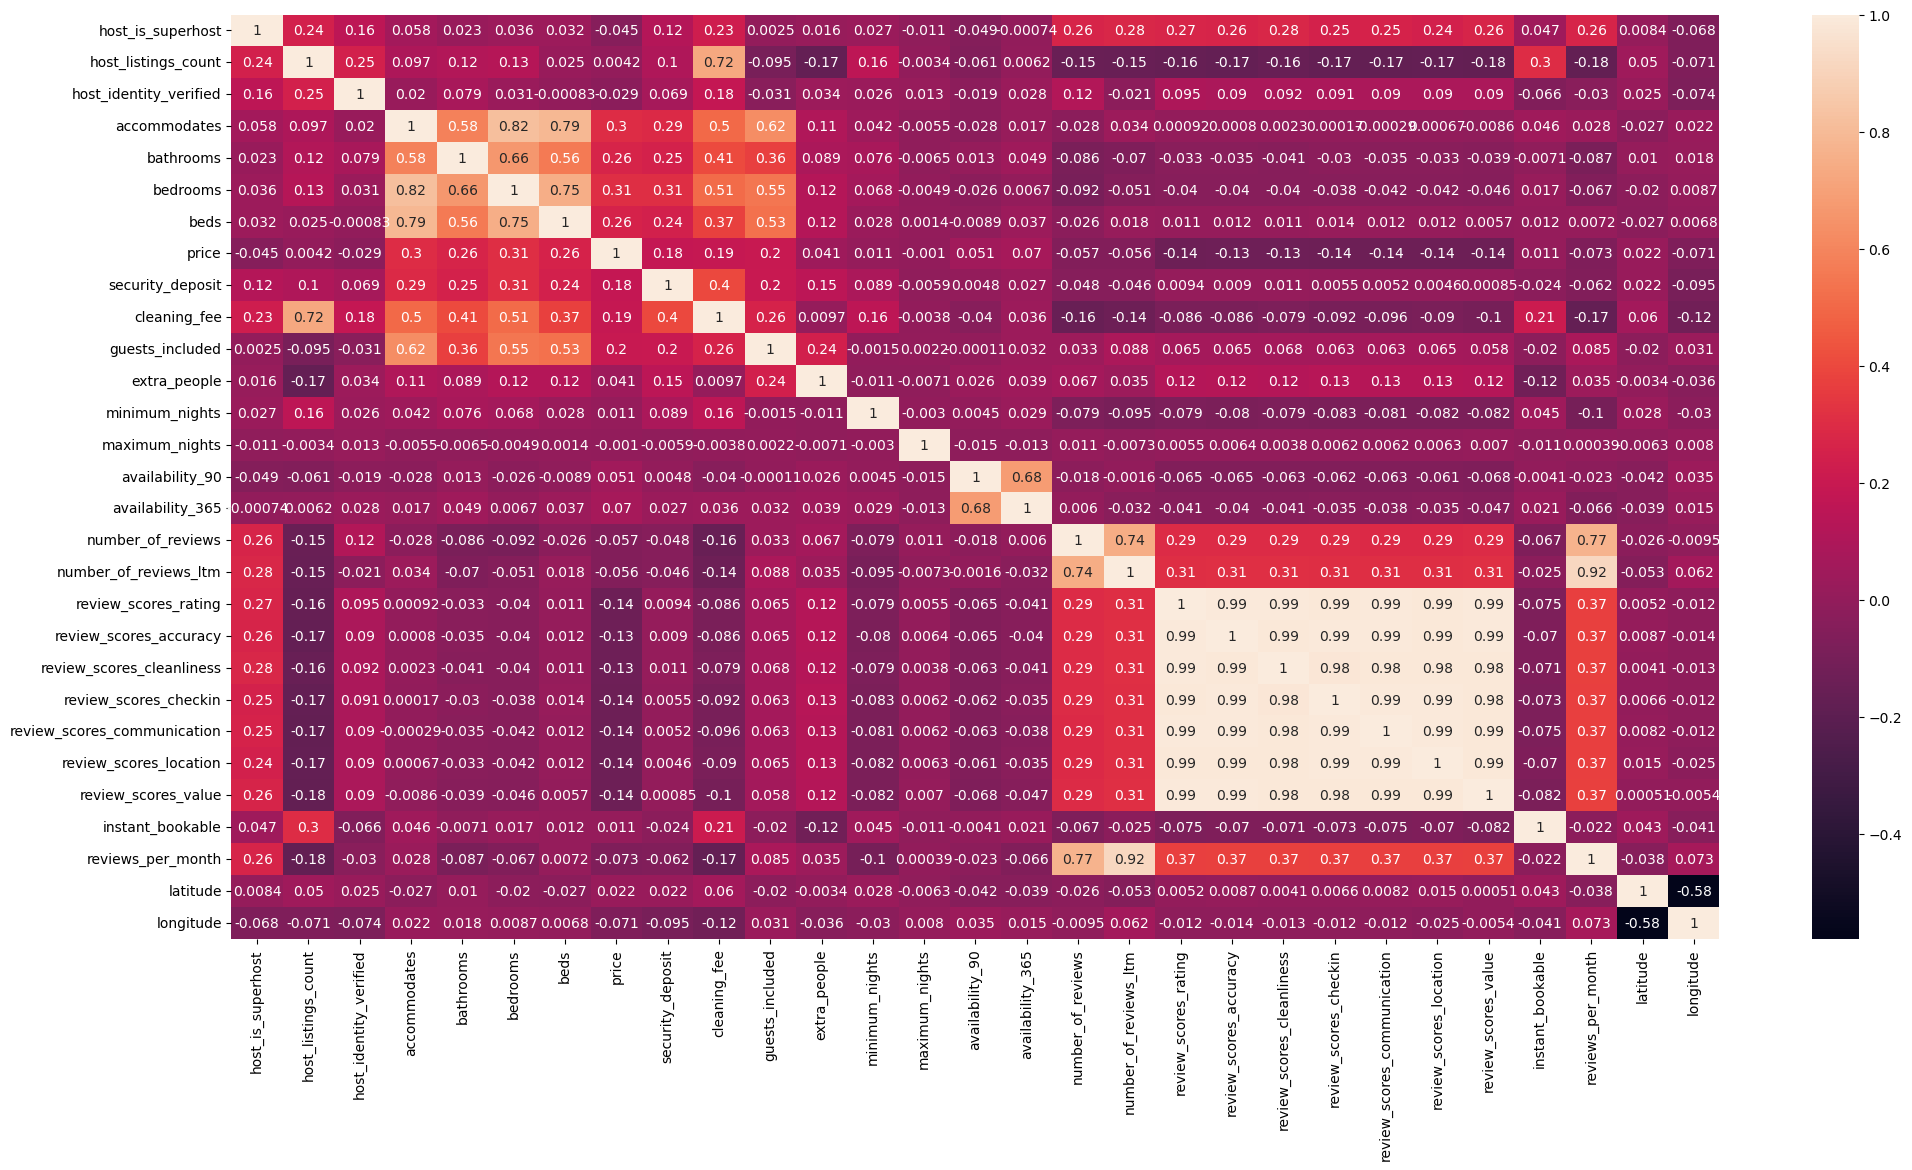

In [16]:
# Create a heatmap

corr = data.corr()
plt.figure(figsize=(24,12))
sns.heatmap(corr, annot=True, linecolor='white')

In [17]:
data['neighbourhood_cleansed'].value_counts()

San Jose                2882
Palo Alto                794
Sunnyvale                768
Santa Clara              711
Mountain View            664
Cupertino                325
Milpitas                 301
Unincorporated Areas     298
Campbell                 131
Los Gatos                 85
Los Altos                 73
Saratoga                  62
Los Altos Hills           52
Morgan Hill               42
Gilroy                    20
Monte Sereno              13
Name: neighbourhood_cleansed, dtype: int64

In [18]:
data.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'reviews_per_month', 'latitude', 'longitude',
       'neighbourhood'],
      dtype='object')

<AxesSubplot:title={'center':'price'}, xlabel='neighbourhood_cleansed'>

Text(0, 0.5, 'Number of Properties')

Text(0.5, 0, 'Neighborhood')

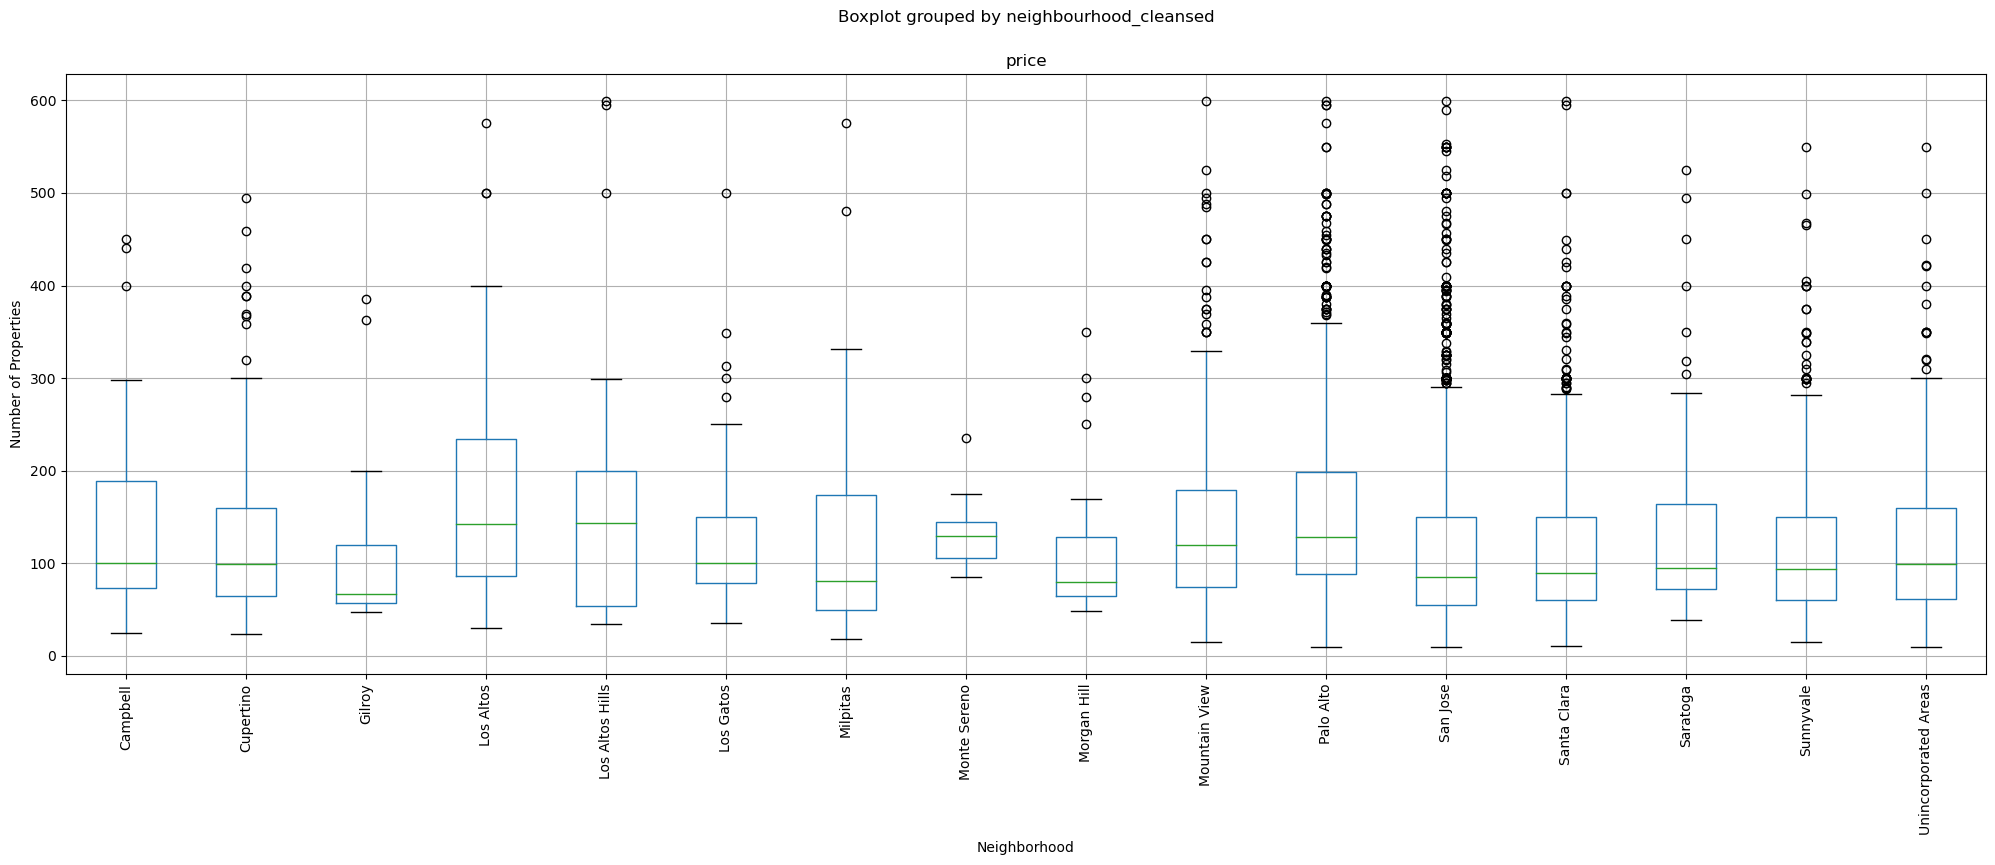

In [19]:
#This illustrates neighborhoods with higher prices

data2 = data[data['price'] < 600]
data2.boxplot(column='price', by='neighbourhood_cleansed', figsize=(24,8), rot=90);
plt.ylabel('Number of Properties')
plt.xlabel('Neighborhood')

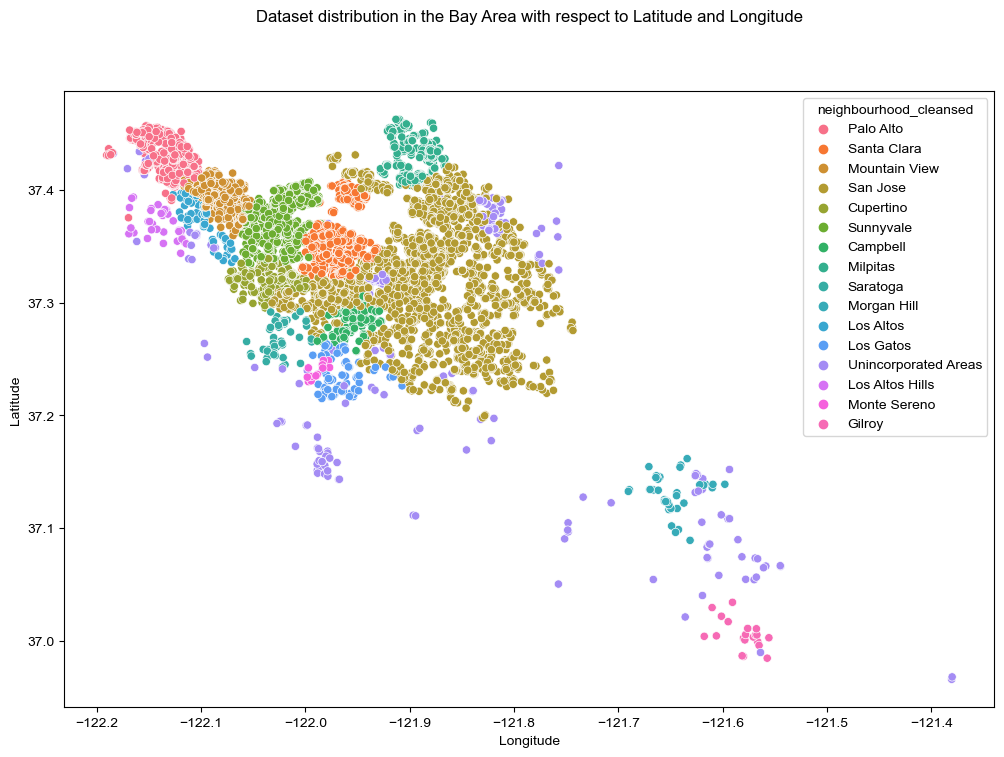

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(data2.longitude,data2.latitude,hue=data2.neighbourhood_cleansed)
sns.set_style("whitegrid")
plt.title('Dataset distribution in the Bay Area with respect to Latitude and Longitude', y=1.1)
plt.ylabel('Latitude')
plt.xlabel('Longitude');

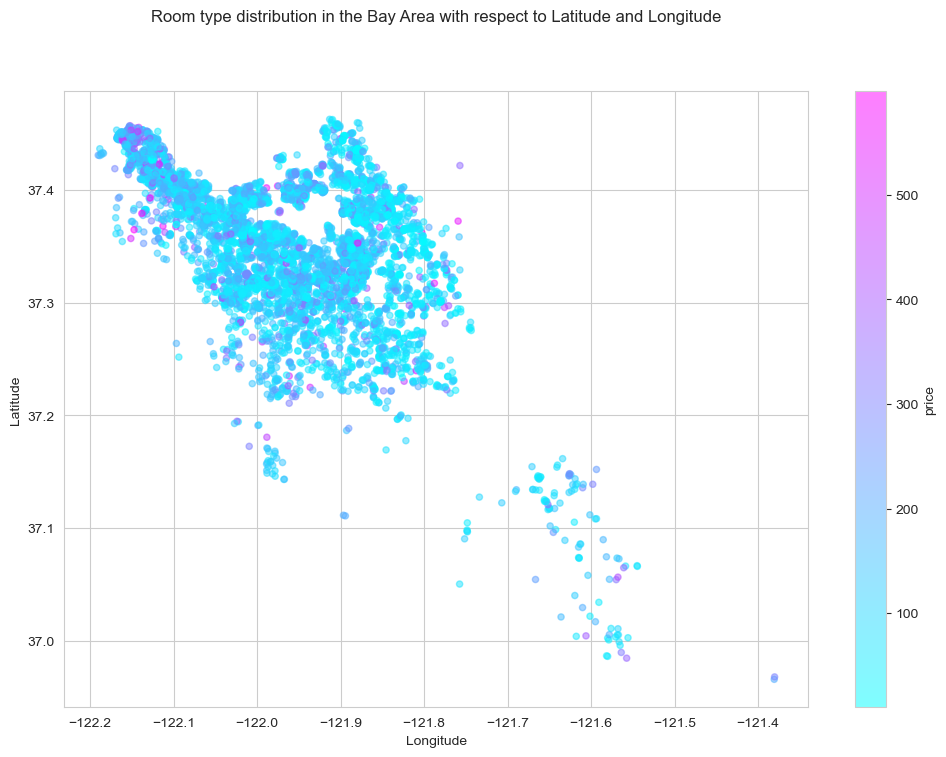

In [21]:
data2.plot.scatter(x='longitude', y='latitude', c='price', figsize=(12,8), cmap='cool', alpha=0.5);
plt.title('Room type distribution in the Bay Area with respect to Latitude and Longitude', y=1.1)
plt.ylabel('Latitude')
plt.xlabel('Longitude');

In [22]:
data2['room_type'].value_counts()
#data = data[data['Hotel room']==False]
data2.shape

Private room       3424
Entire home/apt    3279
Shared room         332
Hotel room            2
Name: room_type, dtype: int64

(7037, 37)

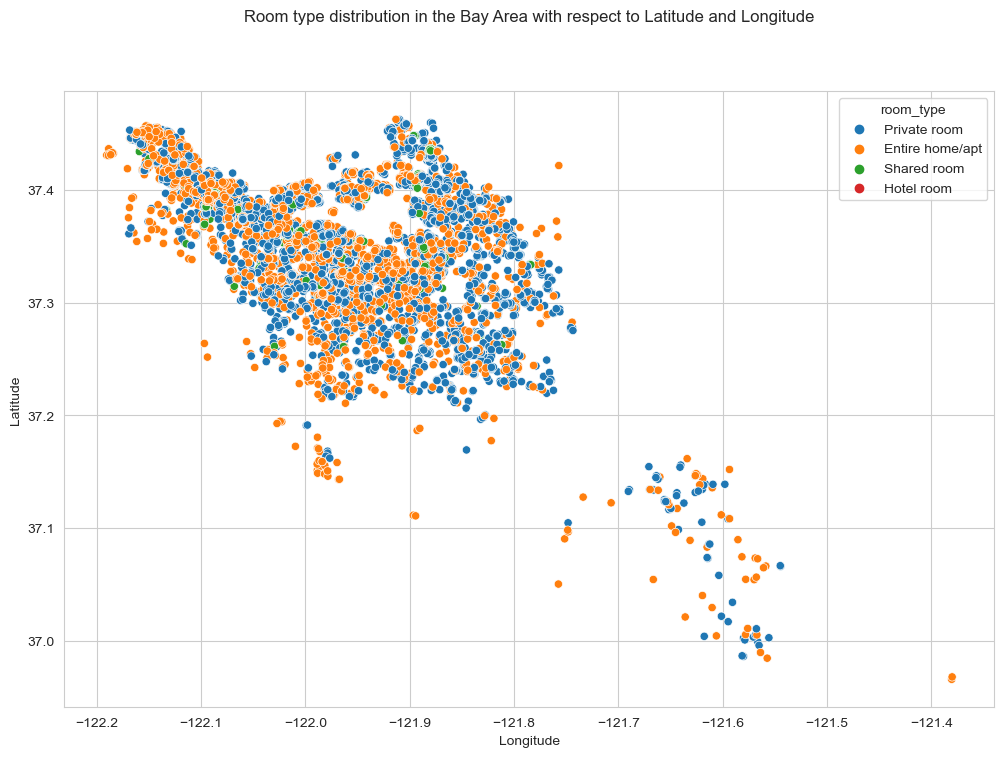

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(data2.longitude,data2.latitude,hue=data.room_type)
plt.title('Room type distribution in the Bay Area with respect to Latitude and Longitude', y=1.1)
plt.ylabel('Latitude')
plt.xlabel('Longitude');

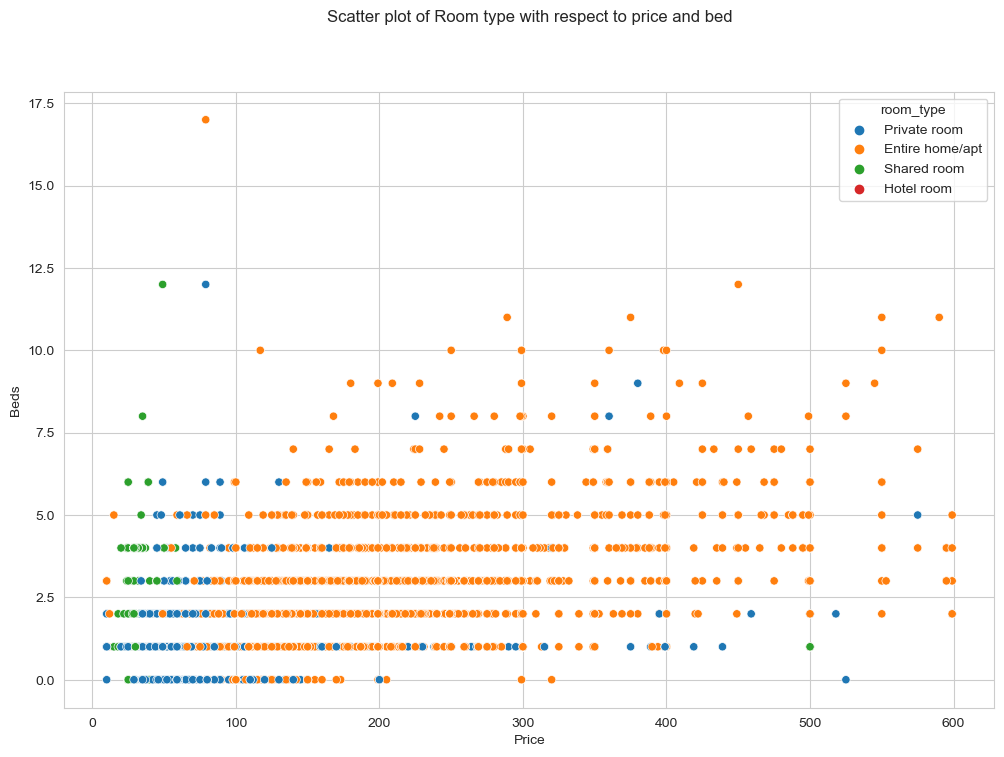

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(data2.price,data2.beds,hue=data2.room_type)
plt.title('Scatter plot of Room type with respect to price and bed', y=1.1)
plt.ylabel('Beds')
plt.xlabel('Price');

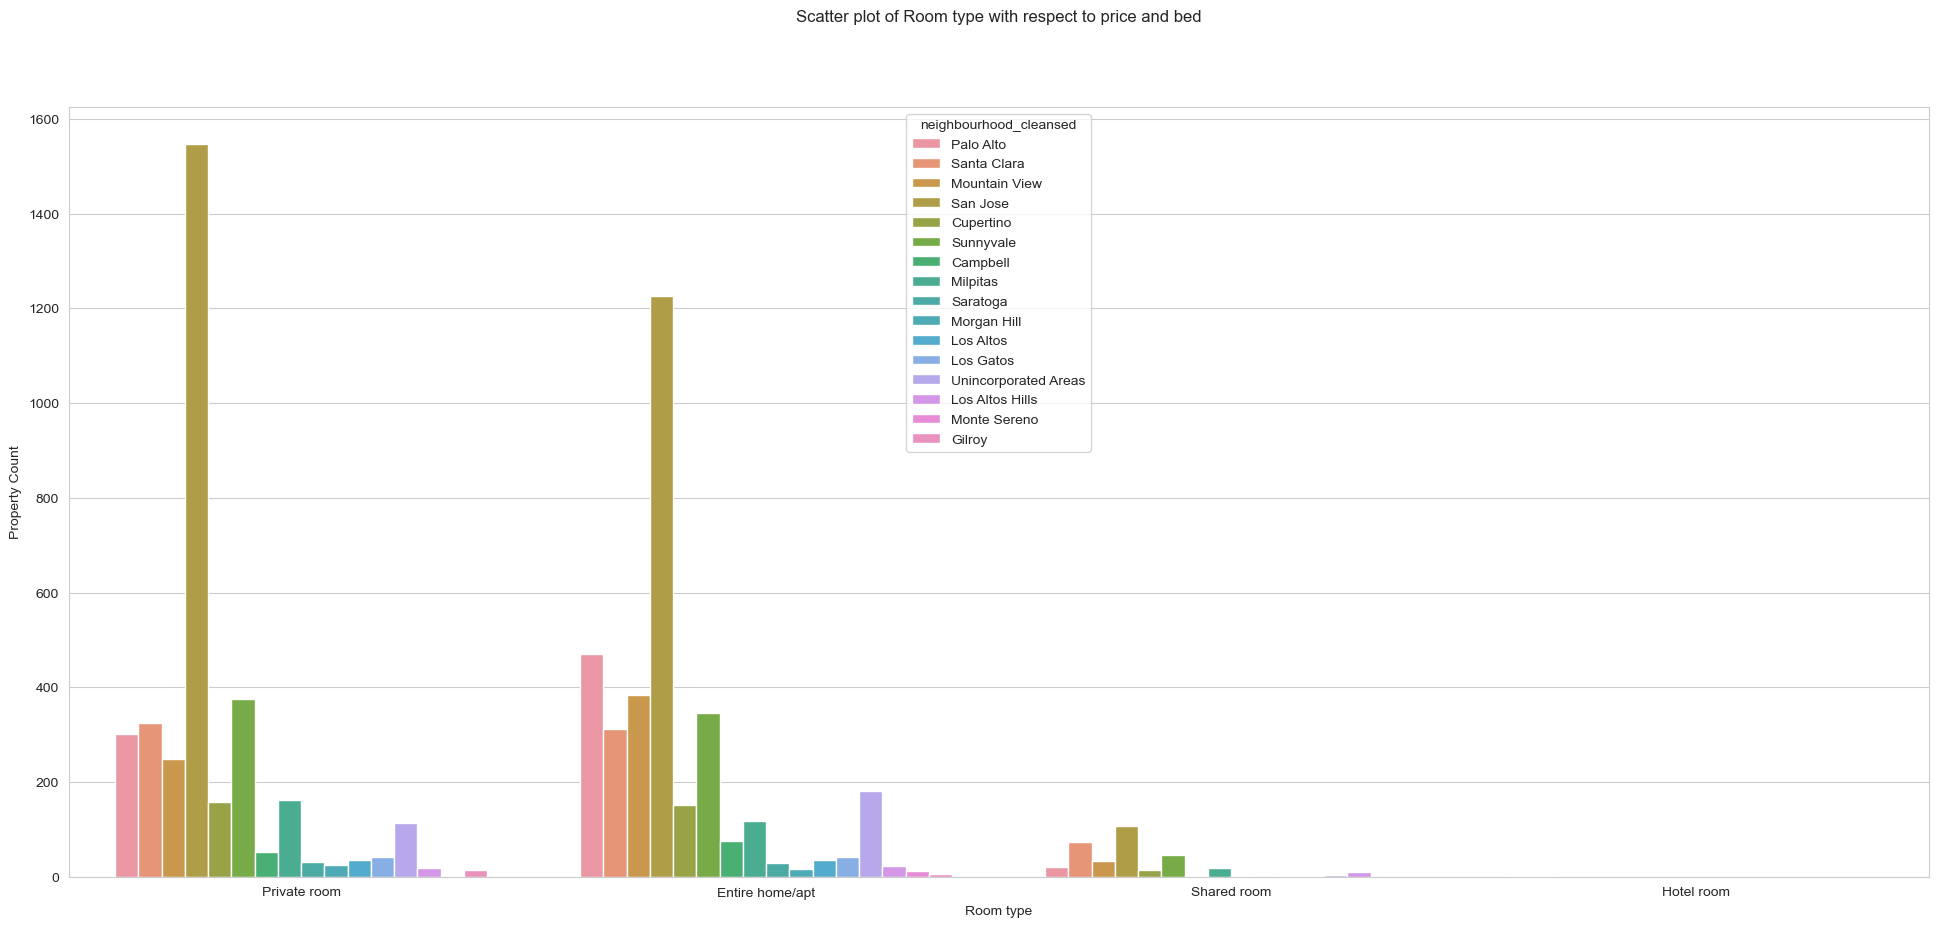

In [25]:
plt.figure(figsize=(24,10))
sns.countplot(data =raw_data, x = 'room_type', hue = 'neighbourhood_cleansed')
plt.title('Scatter plot of Room type with respect to price and bed', y=1.1)
plt.ylabel('Property Count')
plt.xlabel('Room type');

<Figure size 2400x1200 with 0 Axes>

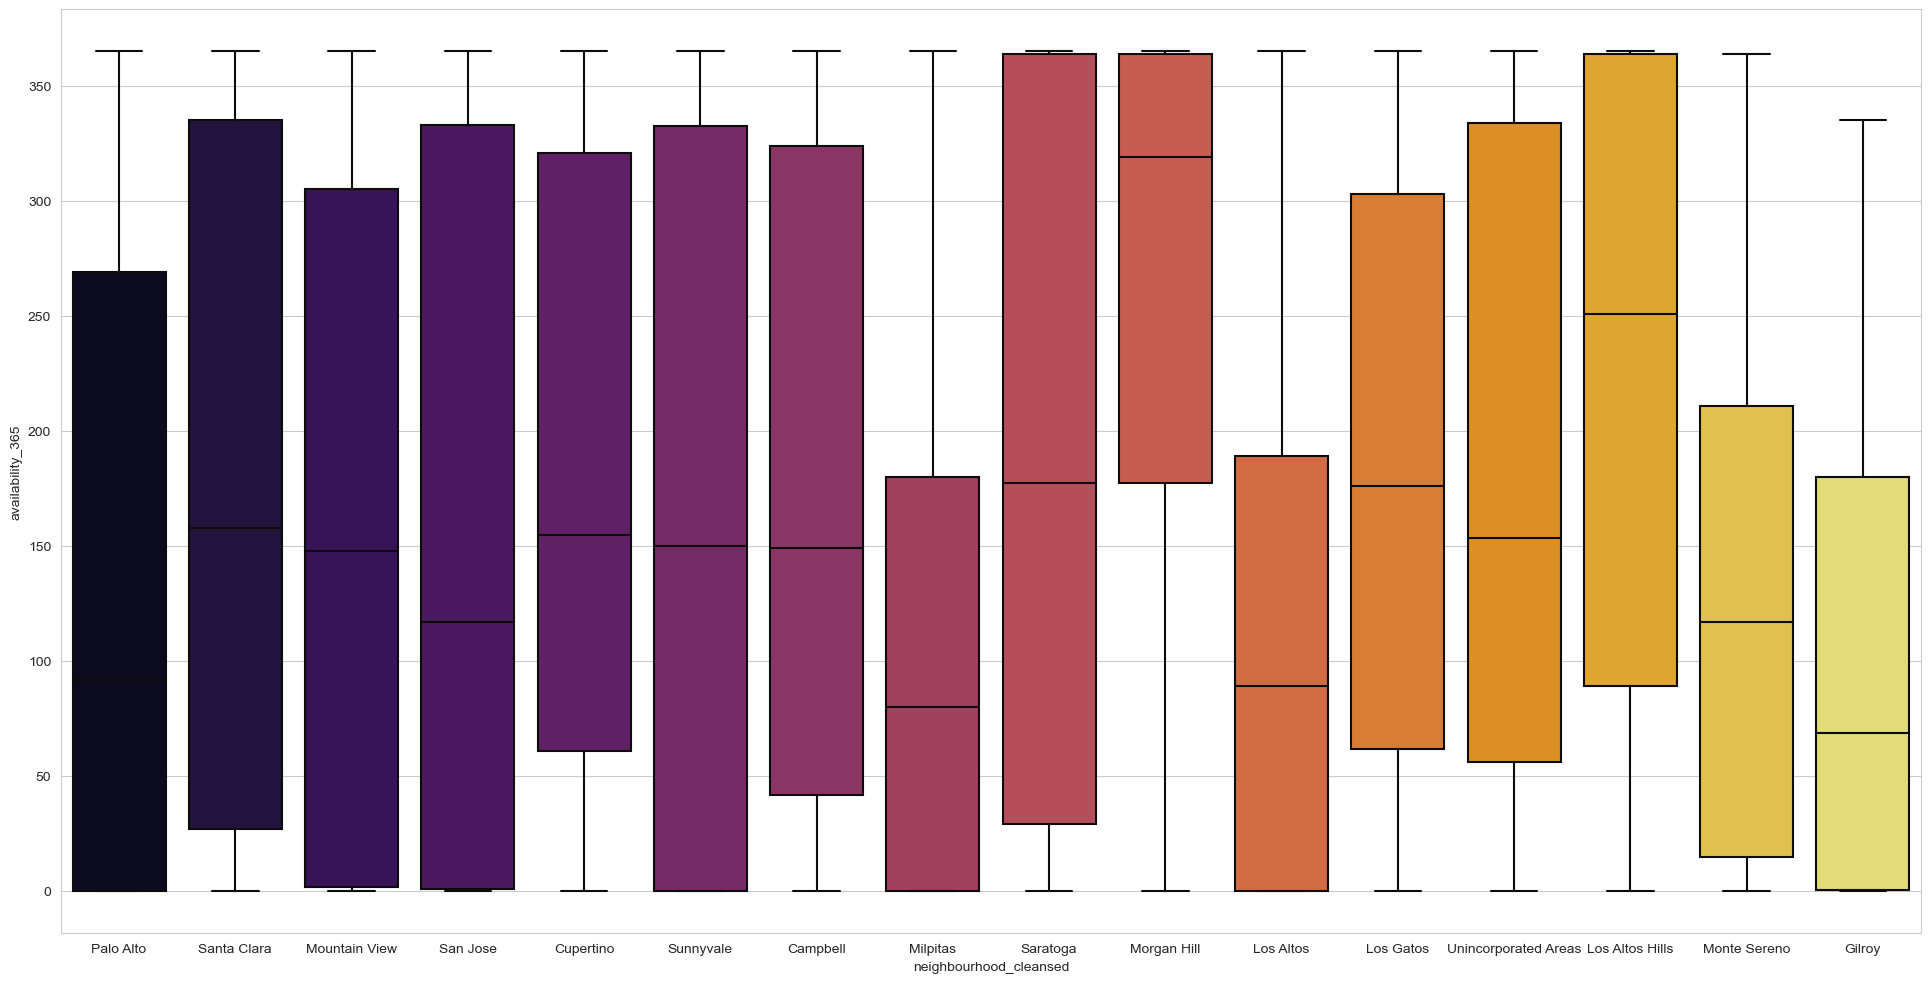

In [26]:
plt.figure(figsize=(24,12))
ax = sns.boxplot(data= raw_data, x='neighbourhood_cleansed',y='availability_365',palette='inferno')

In [27]:
raw_data['neighbourhood'].value_counts().iloc[:10]

Palo Alto           786
Sunnyvale           763
Santa Clara         728
Mountain View       671
Berryessa           437
West Valley         420
Alum Rock           400
Central San Jose    396
Cupertino           325
Edenvale            254
Name: neighbourhood, dtype: int64

<AxesSubplot:>

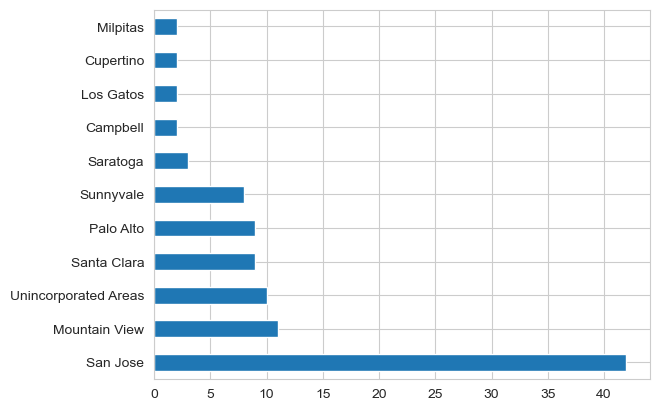

In [28]:
# Rooms with top 100 reviews by neighbourhood
dfr=data2.sort_values(by=['number_of_reviews'],ascending=False).head(100)
dfr['neighbourhood_cleansed'].value_counts().plot(kind = 'barh')

<Figure size 2000x300 with 0 Axes>

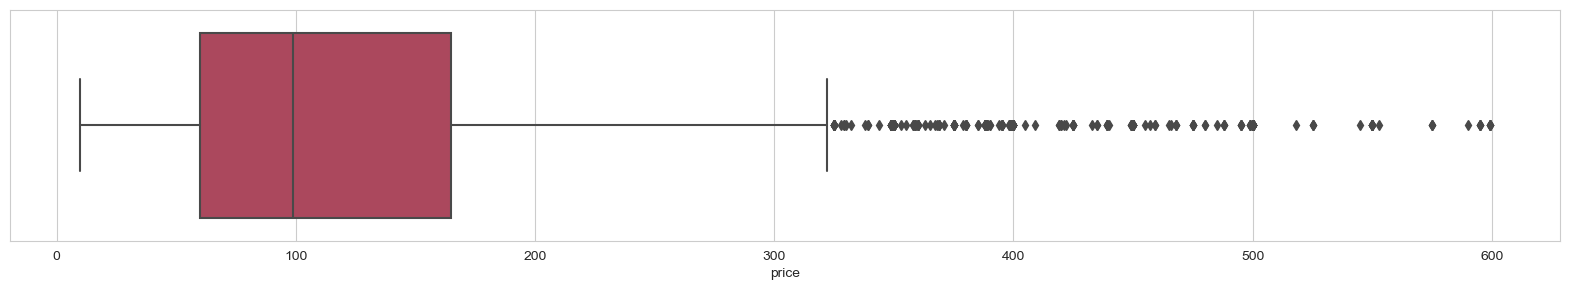

In [29]:
# Display boxplot to find Outliers
plt.figure(figsize=(20,3))
px = sns.boxplot(data= data2, x='price',palette='inferno')

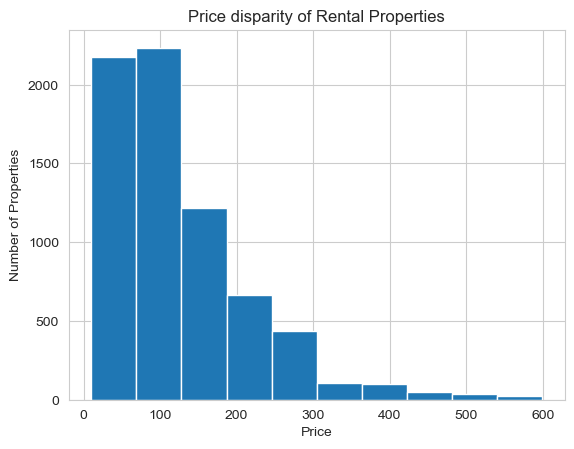

In [30]:
# Rentals in range
data2['price'].hist()
plt.title('Price disparity of Rental Properties', y=1)
plt.ylabel('Number of Properties');
plt.xlabel('Price');

In [31]:
# Find the values that are not unique in the dataset
data.nunique()

host_since                     2085
host_response_time                5
host_response_rate               44
host_is_superhost                 2
host_listings_count              61
host_identity_verified            2
neighbourhood_cleansed           16
property_type                     3
room_type                         4
accommodates                     16
bathrooms                        15
bedrooms                         10
beds                             20
price                           420
security_deposit                 83
cleaning_fee                    167
guests_included                  15
extra_people                     63
minimum_nights                   54
maximum_nights                  123
availability_90                  91
availability_365                361
number_of_reviews               288
number_of_reviews_ltm           108
review_scores_rating             41
review_scores_accuracy            9
review_scores_cleanliness         9
review_scores_checkin       

In [32]:
# Remove the outliers to achieve a better distribution
df = data
clean = ['host_since', 'host_response_time', 'host_response_rate', 'host_listings_count', 'neighbourhood_cleansed',
        'availability_90', 'number_of_reviews_ltm', 'cancellation_policy', 'review_scores_accuracy', 'review_scores_cleanliness',
        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 
        'cancellation_policy', 'latitude', 'longitude', 'neighbourhood', 'property_type', 'room_type']

vars1 = ['host_is_superhost', 'host_identity_verified', 'accommodates', 'bathrooms', 
         'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
         'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating',
         'instant_bookable', 'reviews_per_month']

#df.drop(columns = clean, axis=1, inplace= True);
df = data[vars1]
df= df[df["price"] < 600];
df = df[df["price"] > 10];

host_is_superhost           2
host_identity_verified      2
accommodates               16
bathrooms                  12
bedrooms                    9
beds                       14
price                     349
security_deposit           83
cleaning_fee              159
guests_included            14
extra_people               63
minimum_nights             51
maximum_nights            122
availability_365          361
number_of_reviews         288
review_scores_rating       41
instant_bookable            2
reviews_per_month         648
dtype: int64

(7221, 37)

(7027, 18)

<Figure size 2000x800 with 0 Axes>

<AxesSubplot:>

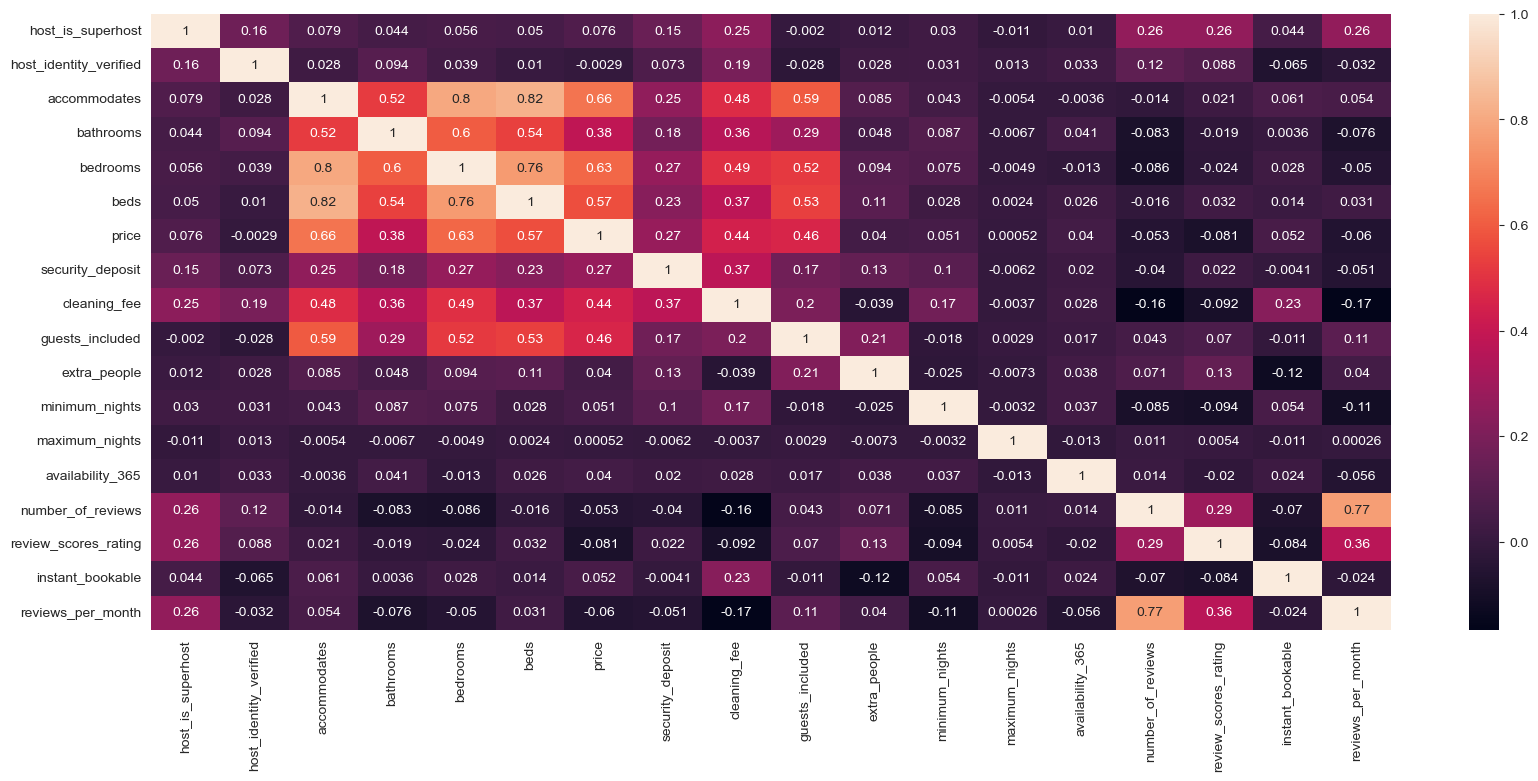

In [33]:

df.nunique()
data.shape
df.shape

# Create a heatmap

corr2 = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr2, annot=True, linecolor='white')

# Linear Regression

In [34]:
# Split data into Training and Test set

df_train, df_test = train_test_split(df, train_size = 0.80, test_size = 0.20, random_state = 0)

train = df_train[vars1]
test = df_test[vars1]

#y1 = df_train.iloc[:,6].values
#y2 = df_test.iloc[:,6].values
df_train.head()

,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
6239,0.0,1.0,2,1.5,1.0,1.0,53,300,10,1,0,5,28,31,8,93.0,0,1.33
6420,0.0,0.0,6,1.0,2.0,3.0,322,0,0,6,0,1,14,263,0,0.0,1,0.00
977,0.0,0.0,3,1.0,1.0,1.0,79,0,40,1,0,5,1125,353,83,88.0,0,1.53
5369,0.0,0.0,5,1.0,1.0,5.0,129,500,160,6,0,1,7,0,0,0.0,0,0.00
5675,1.0,0.0,5,1.0,2.0,2.0,199,300,129,2,5,30,1125,2,6,100.0,1,0.72


In [35]:
# Feature scale the data
sc = StandardScaler()
train[vars1] = sc.fit_transform(df_train[vars1])
test[vars1] = sc.fit_transform(df_test[vars1])
y_train = train.pop('price')
y_test = test.pop('price')

train.head()
y_train.head()

,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
6239,-0.911889,1.131106,-0.446376,0.259969,-0.398773,-0.525968,0.132112,-0.697628,-0.439750,-0.624682,-0.141751,-0.013362,-0.904030,-0.429346,0.402070,-0.906014,0.134429
6420,-0.911889,-0.884091,1.400572,-0.561902,0.718070,0.963811,-0.518348,-0.794140,3.036810,-0.624682,-0.257541,-0.013363,0.735938,-0.582653,-2.087278,1.103735,-0.748441
977,-0.911889,-0.884091,0.015361,-0.561902,-0.398773,-0.525968,-0.518348,-0.408090,-0.439750,-0.624682,-0.141751,-0.013324,1.372133,1.007915,0.268234,-0.906014,0.267191
5369,-0.911889,-0.884091,0.938835,-0.561902,-0.398773,2.453589,0.565753,0.750062,3.036810,-0.624682,-0.257541,-0.013363,-1.123164,-0.582653,-2.087278,-0.906014,-0.748441
5675,1.096625,-0.884091,0.938835,-0.561902,0.718070,0.218921,0.132112,0.450872,0.255562,-0.385806,0.581939,-0.013324,-1.109027,-0.467673,0.589440,1.103735,-0.270496


6239   -0.804306
6420    2.207869
977    -0.513167
5369    0.046717
5675    0.830555
Name: price, dtype: float64

## Linear Regression

In [36]:
from sklearn import metrics

def print_evaluate(true,predicted):
    mae = metrics.mean_absolute_error(true,predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('\nMAE:', mae)
    print('\nMSE:', mse)
    print('\nRMSE:', rmse)
    print('\nR2 Square', r2_square)

In [37]:
# Create the linear model
# Define the Model
lr = LinearRegression()
# Fit the Model
lr.fit(train, y_train)

LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error
#Predict the model
y_pred = lr.predict(test)

In [39]:
print("Error/Accuracy Analysis :")
print_evaluate(y_test, y_pred)

Error/Accuracy Analysis :

MAE: 0.4828402766505583

MSE: 0.4758276254354985

RMSE: 0.6898025988900727

R2 Square 0.5241723745645015


## Support Vector Machine

In [40]:
#Import SVR to the dataset
from sklearn.svm import SVR
#Define the Model
svr = SVR(kernel = 'rbf')
#Fit the model
svr.fit(train, y_train)

SVR()

In [41]:
# Predicting
svrPred = svr.predict(test)
print("Error/Accuracy Analysis :")
print_evaluate(y_test, svrPred)

Error/Accuracy Analysis :

MAE: 0.384707300691661

MSE: 0.36757137781002236

RMSE: 0.6062766512162763

R2 Square 0.6324286221899776
